In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from scipy.stats import chi2_contingency

## Read Data:
- bank client data:
    1. age (numeric)
    2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
    3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4. education (categorical: "unknown","secondary","primary","tertiary")
    5. default: has credit in default? (binary: "yes","no")
    6. balance: average yearly balance, in euros (numeric) 
    7. housing: has housing loan? (binary: "yes","no")
    8. loan: has personal loan? (binary: "yes","no")
    9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
    10. day: last contact day of the month (numeric)
    11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    12. duration: last contact duration, in seconds (numeric)
    13. campaign: number of contacts performed during previous campaign and for this client (numeric, includes last contact)
    14. pdays: number of days that passed by after the client was last contacted from before previous campaign (numeric, -1 means client was not previously contacted)
    15. previous: number of contacts performed on previous campaign and for this client (numeric)
    16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
    17. y: has the client subscribed a term deposit? (binary: "yes","no")

In [29]:
path_bank_full = 'bank/bank-full.csv'
path_bank_add = 'bank-additional/bank-additional-full.csv'

In [30]:
bank_full = pd.read_csv(path_bank_full, sep = ';' )
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [31]:
# bank_add = pd.read_csv(path_bank_add, sep = ';')
# bank_add

In [32]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [33]:
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Check Missing Value

In [34]:
bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Drop Duplicate

In [35]:
dup = bank_full[bank_full.duplicated()]
dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# Check Outlier

<Axes: >

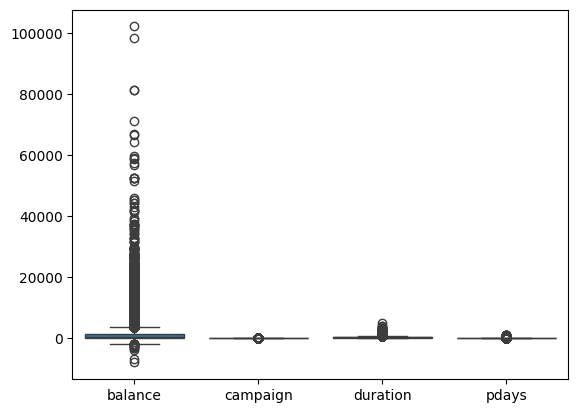

In [36]:
sns.boxplot(data = bank_full[['balance', 'campaign', 'duration', 'pdays']])

In [37]:
#add note in report
minus = bank_full[bank_full['balance'] < 0]
minus

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


<Axes: xlabel='balance', ylabel='Count'>

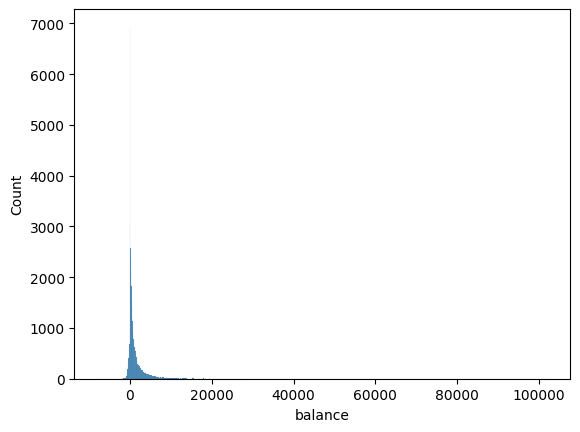

In [38]:
sns.histplot(data = bank_full, x = 'balance')

<Axes: xlabel='duration', ylabel='Count'>

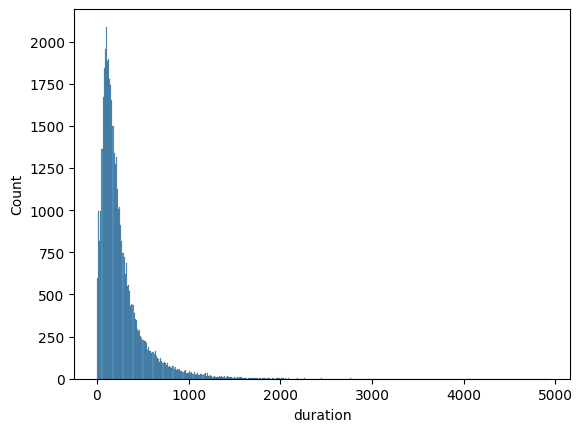

In [39]:
sns.histplot(data = bank_full, x = 'duration')

<Axes: xlabel='campaign', ylabel='Count'>

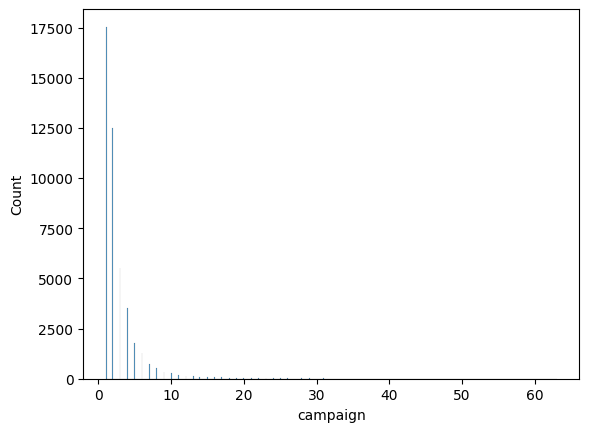

In [40]:
sns.histplot(data = bank_full, x = 'campaign')

<Axes: xlabel='pdays', ylabel='Count'>

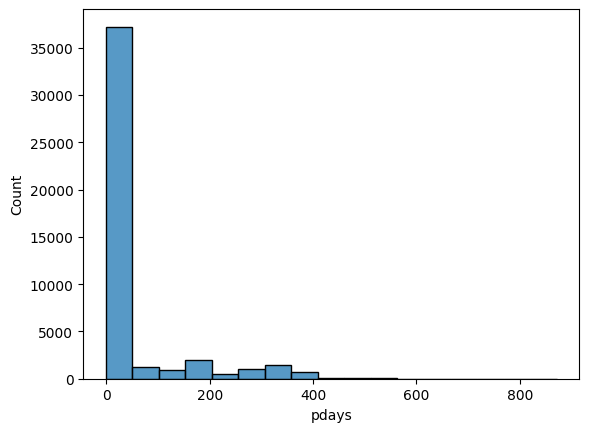

In [41]:
sns.histplot(data = bank_full, x = 'pdays')

# EDA

<Axes: xlabel='y', ylabel='count'>

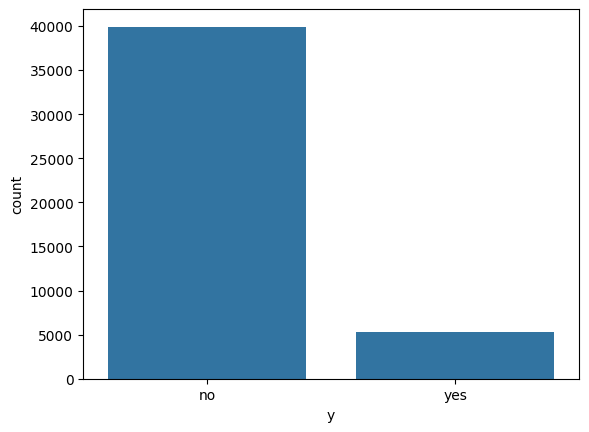

In [45]:
sns.countplot(x = 'y', data = bank_full)

In [46]:
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [47]:
loan_client = bank_full[(bank_full['housing'] == 'yes') | (bank_full['loan'] == 'yes')]
loan_client

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


In [48]:
deposit_client = bank_full[bank_full['y'] == 'yes']
deposit_client

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [65]:
sub_percentage = bank_full['y'].value_counts(normalize = True) * 100
sub_percentage

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

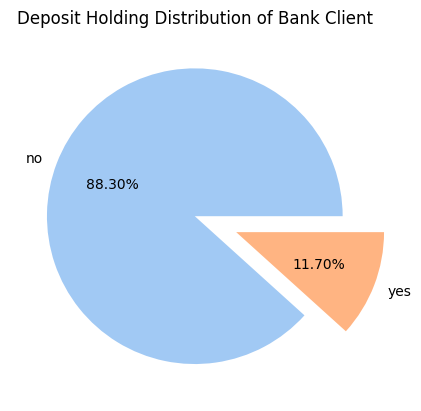

In [50]:
explode = [0, 0.3]

palette_color = sns.color_palette('pastel')

plt.pie(sub_percentage,
        labels = sub_percentage.index,
        colors = palette_color,
        explode = explode,
        autopct = '%.2f%%')
plt.title("Deposit Holding Distribution of Bank Client")

plt.show()

In [51]:
no_percentage = bank_full[bank_full['y'] == 'no']

no_percentage = no_percentage['poutcome'].value_counts(normalize = True)*100

no_percentage

poutcome
unknown    84.096488
failure    10.728420
other       3.839988
success     1.335103
Name: proportion, dtype: float64

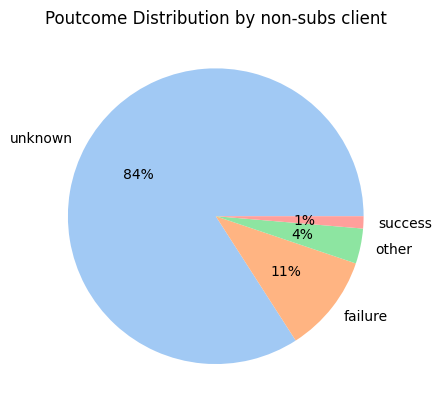

In [52]:
palette_color = sns.color_palette('pastel')

plt.pie(no_percentage,
        labels = no_percentage.index,
        colors = palette_color,
        autopct = '%.0f%%')
plt.title("Poutcome Distribution by non-subs client")

plt.show()

In [53]:
yes_percentage = bank_full[bank_full['y'] == 'yes']

yes_percentage = yes_percentage['poutcome'].value_counts(normalize = True)*100

yes_percentage

poutcome
unknown    64.019663
success    18.491208
failure    11.684628
other       5.804500
Name: proportion, dtype: float64

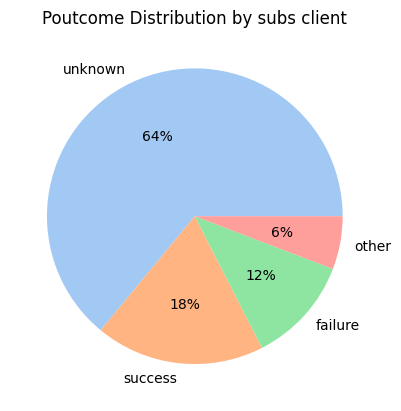

In [54]:
palette_color = sns.color_palette('pastel')

plt.pie(yes_percentage,
        labels = yes_percentage.index,
        colors = palette_color,
        autopct = '%.0f%%')
plt.title("Poutcome Distribution by subs client")

plt.show()

In [55]:
df_crosstab = pd.crosstab(bank_full['y'], bank_full['poutcome'], normalize = 'index',dropna = False).round(4)*100
df_crosstab

poutcome,failure,other,success,unknown
y,,,,
no,10.73,3.84,1.34,84.10
yes,11.68,5.80,18.49,64.02


In [56]:
success_engagement = bank_full[bank_full['poutcome'] == 'success'].shape[0]

total_contacs = bank_full[bank_full['poutcome'] != 'unknown'].shape[0]

previous_er = (success_engagement / total_contacs) * 100

print(f'Previous Campaign Engagement Rate: {previous_er:.2f}%')

Previous Campaign Engagement Rate: 18.31%


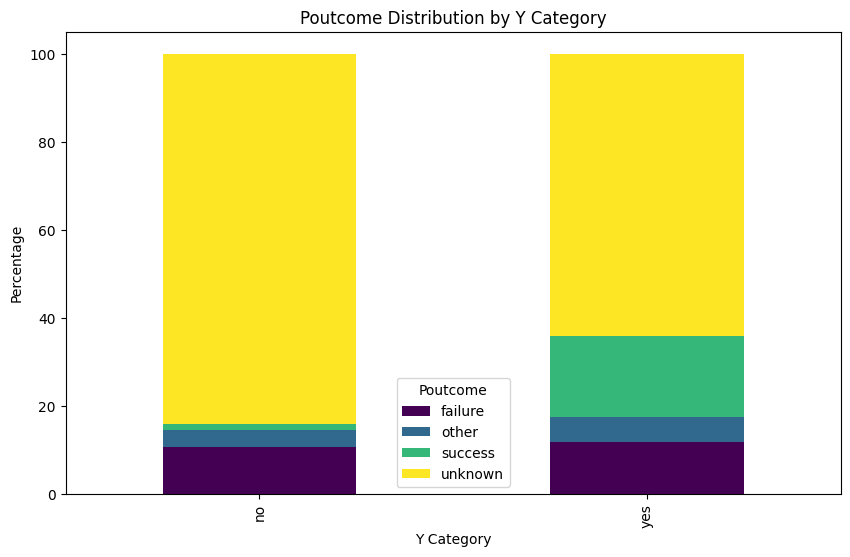

In [57]:
df_crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Poutcome Distribution by Y Category")
plt.xlabel("Y Category")
plt.ylabel("Percentage")
plt.legend(title="Poutcome")
plt.show()

In [58]:
df_crosstab = pd.crosstab(bank_full['poutcome'], bank_full['y'], dropna = False)
df_crosstab

y,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


In [ ]:
grouped = bank_full.groupby(['poutcome', 'y']).size().unstack(fill_value=0)

grouped['percentage_yes'] = (grouped['yes'] / (grouped['yes'] + grouped['no'])) * 100

grouped[['yes', 'no', 'percentage_yes']]

y,yes,no,percentage_yes
poutcome,,,
failure,618,4283,12.609671
other,307,1533,16.684783
success,978,533,64.725347
unknown,3386,33573,9.161503


<Axes: xlabel='poutcome', ylabel='percentage_yes'>

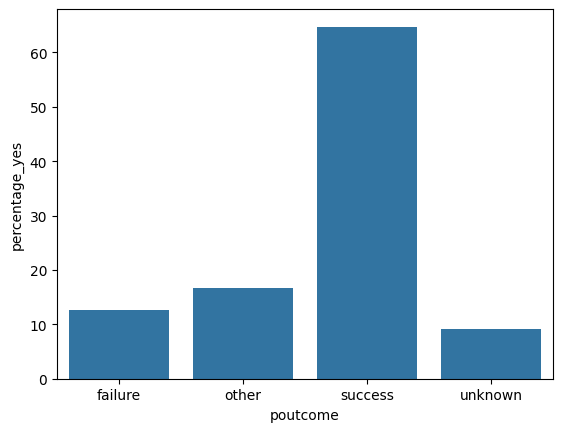

In [60]:
sns.barplot(x = 'poutcome', y = 'percentage_yes', data = grouped)

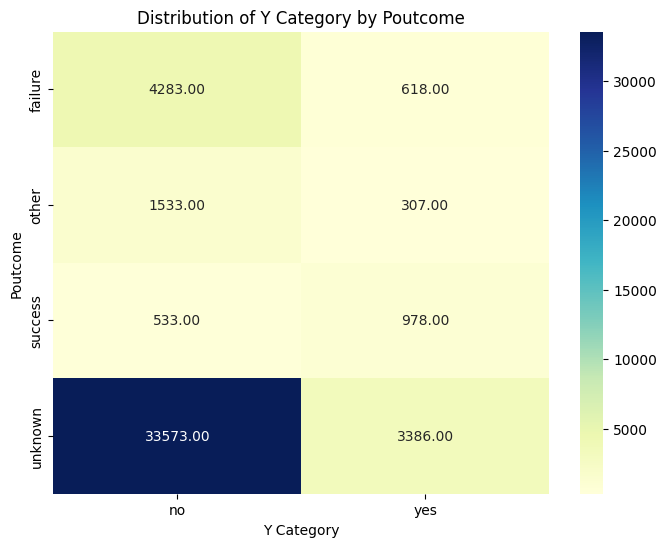

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_crosstab, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Distribution of Y Category by Poutcome")
plt.xlabel("Y Category")
plt.ylabel("Poutcome")
plt.show()

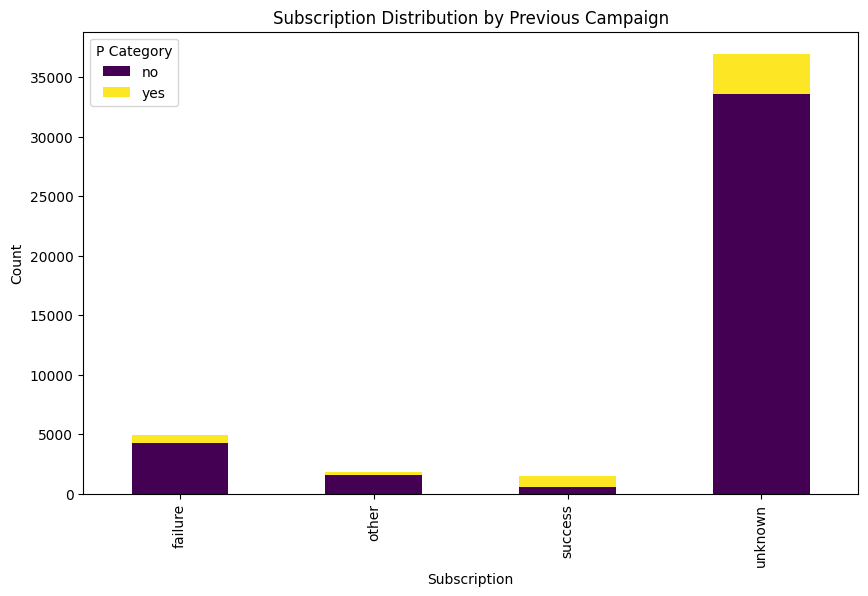

In [62]:
df_crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Subscription Distribution by Previous Campaign")
plt.xlabel("Subscription")
plt.ylabel("Count")
plt.legend(title="P Category")
plt.show()

In [63]:
chi2, p, dof, expected = chi2_contingency(df_crosstab)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 4391.5065887686615
p-value: 0.0
Degrees of freedom: 3
Expected frequencies:
[[ 4327.65747274   573.34252726]
 [ 1624.74795957   215.25204043]
 [ 1334.23596028   176.76403972]
 [32635.35860742  4323.64139258]]


# Business Problem

Business problem:
- Rendahnya subcripstion rate dari term-deposite yang hanya 11.6%.
- Dampak : Bank revenue
- Why :
    - Term-deposit biasanya mempunyai rate bunga yang rendah, karena itu tingginya subs rate akan membantu mengurangi funding cost (cost efficiency).
    - Tingginya subs rate bisa meningkatkan kapasitas untuk untuk pengguanaan loan (loan = higher interest income).
    - Mempengaruhi net interest rate spread (ukuran margin keuntungan).
    - Kesempatan untuk cross selling produk dan jasa tambahan.

Solution:
- Meningkatkan subcripstion rate menjadi minimal 15%

How:
- Mencari faktor-faktor yang mempengaruhi subscripstion rate
- Melakukan segmentasi berdasarkan pattern nasabah
- Melakukan prediksi (Nice to have) 

Client Pattern:
- Demographic information (age, job, marital status, education)
- Economic information (default, balance, housing or loan)
- Past campaign interactions (campaign, poutcomes)
- Engagement level (duration, contact)
- Temporal factors (day, month)